In [1]:
!pip install tensorflow==2.9
!pip install keras==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 33.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorfl

In [2]:
import keras
import tensorflow

In [3]:
print(keras.__version__)
print(tensorflow.__version__)

2.9.0
2.9.0


In [4]:
# importing required libraries
import tensorflow
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
doc = files.upload()

Saving forestfires.csv to forestfires.csv


In [8]:
frst_df = pd.read_csv("forestfires.csv")
frst_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
# Checking unique values in month column
frst_df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [10]:
# Checking unique values in day column
frst_df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

    - Since, One Hot encoding increase the features which increase the complexity of the model, and since month and day shows ordinal data.
    - We better use LabelEncoder to encode them and will ignore One Hot encoded on month and day columns.
    - Since, doing this reduce the features, reduce the computation and reduce the complexity  of the  model.
  

In [11]:
# Creating new dataframe with required columns only
df = frst_df[['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','size_category']]
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [12]:
# Mapping the month and day column with numbers such as jan will be mapped as 1, feb as 2 and so on.
# Same way for day, mon will be mapped as 1, tue as 2 and so on

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days = ['mon','tue','wed','thu','fri','sat','sun']
size = ['small','large']
# Creating a custom mapping from month and day names to numbers
month_mapping = {month: i+1 for i, month in enumerate(months)}
day_mapping = {day: i+1 for i, day in enumerate(days)}
size_cat_mapping = {size_category: i for i,size_category in enumerate(size)}
# Applying the custom mapping
df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)
df['size_category'] = df['size_category'].map(size_cat_mapping)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


In [13]:
df.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category      int64
dtype: object

In [14]:
df.shape

(517, 12)

    Initially, there were 31 columns, now columns are reduced to 12 only

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [16]:
df.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.268859
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [17]:
# Checking if null values present in any column
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [18]:
# Checking any duplicate rows present
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,8,3,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0
100,8,7,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0
215,3,6,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,1
303,6,5,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,0
426,8,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0
461,8,6,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0
501,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0
508,8,5,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0


    Here, our dataset contains duplicate rows, so we will drop them.
    Since, duplicate rows don't play any positive role, same information is just repeating so we will drop them.

In [19]:
# Checking any duplicate column present
df.T.duplicated()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
size_category    False
dtype: bool

In [20]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


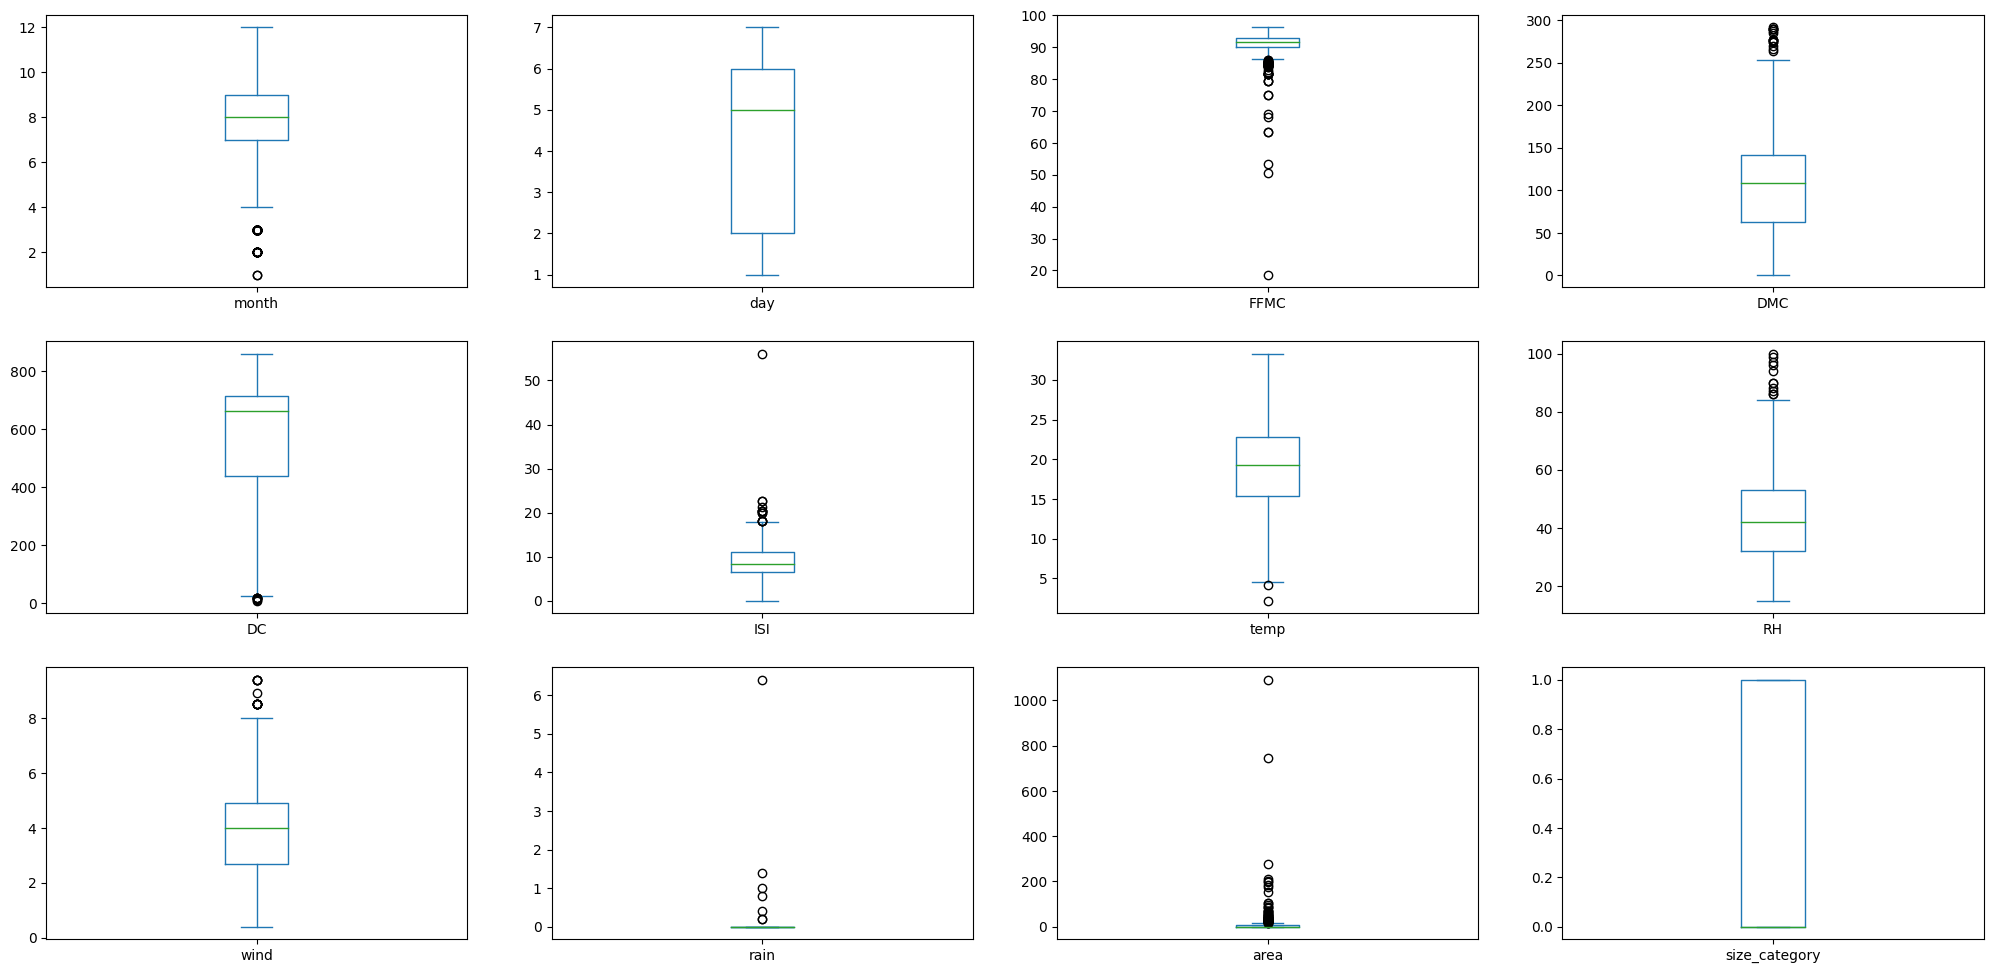

In [21]:
# Boxplot to check the outliers and distributiom of the data, where we can see month,FFMC,DMC,DC,ISI,RH,wind,rain,area shows outliers in the data.
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(25,12))
plt.show()

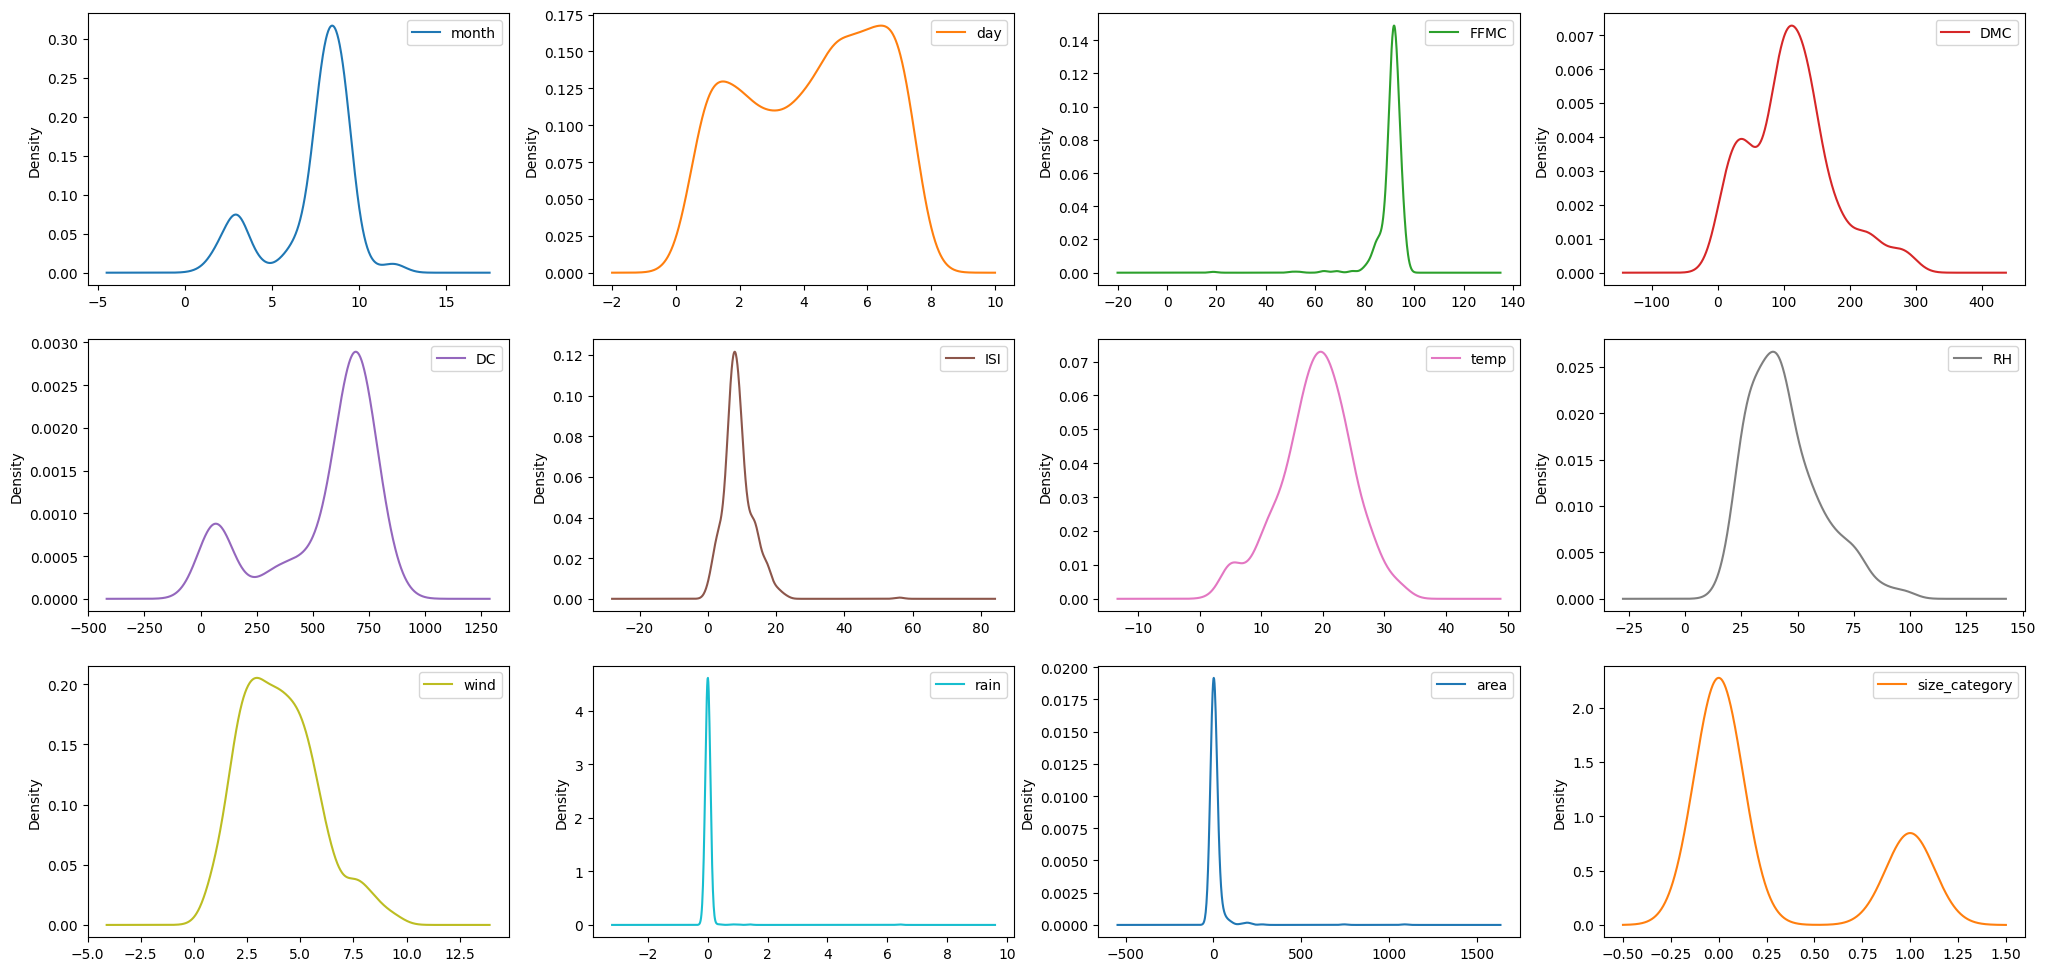

In [22]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False, figsize=(25,12))
plt.show()

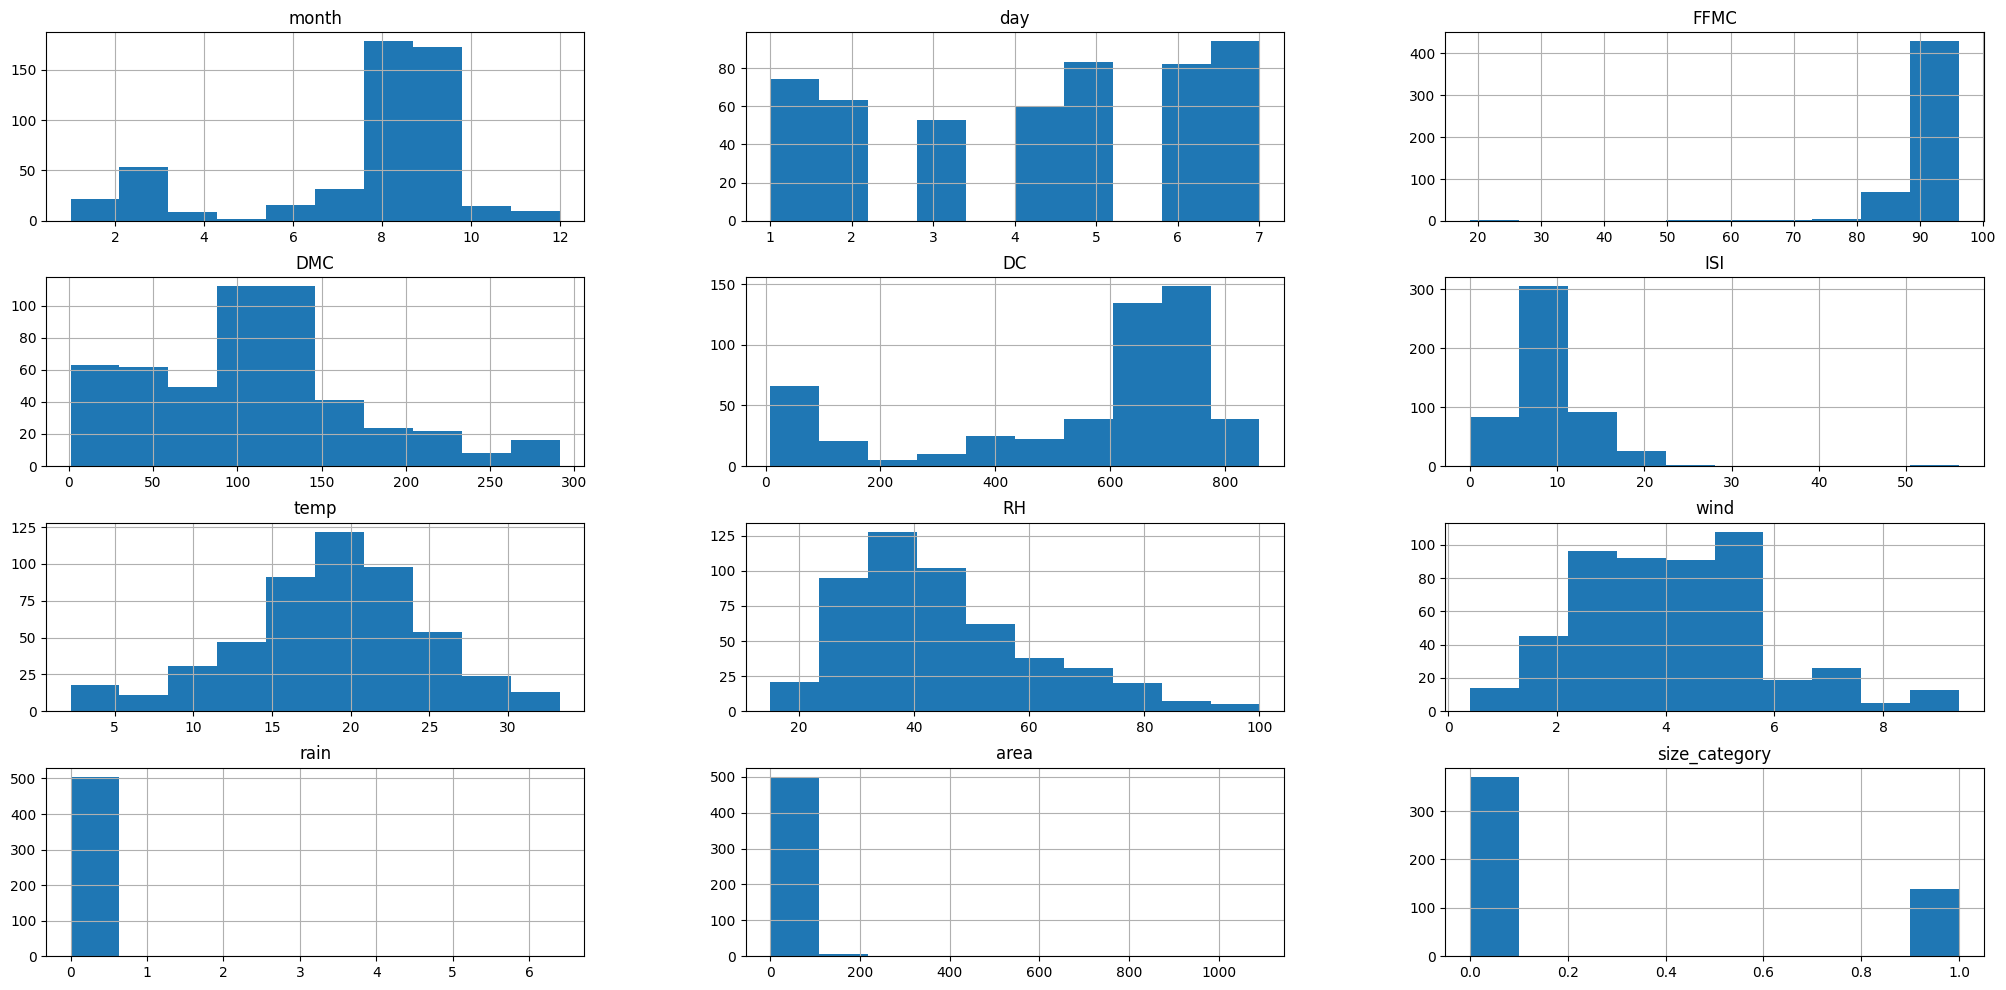

In [ ]:
# temp shows the normal distribution with very less skewness
df.hist(figsize=(25,12))
plt.show()

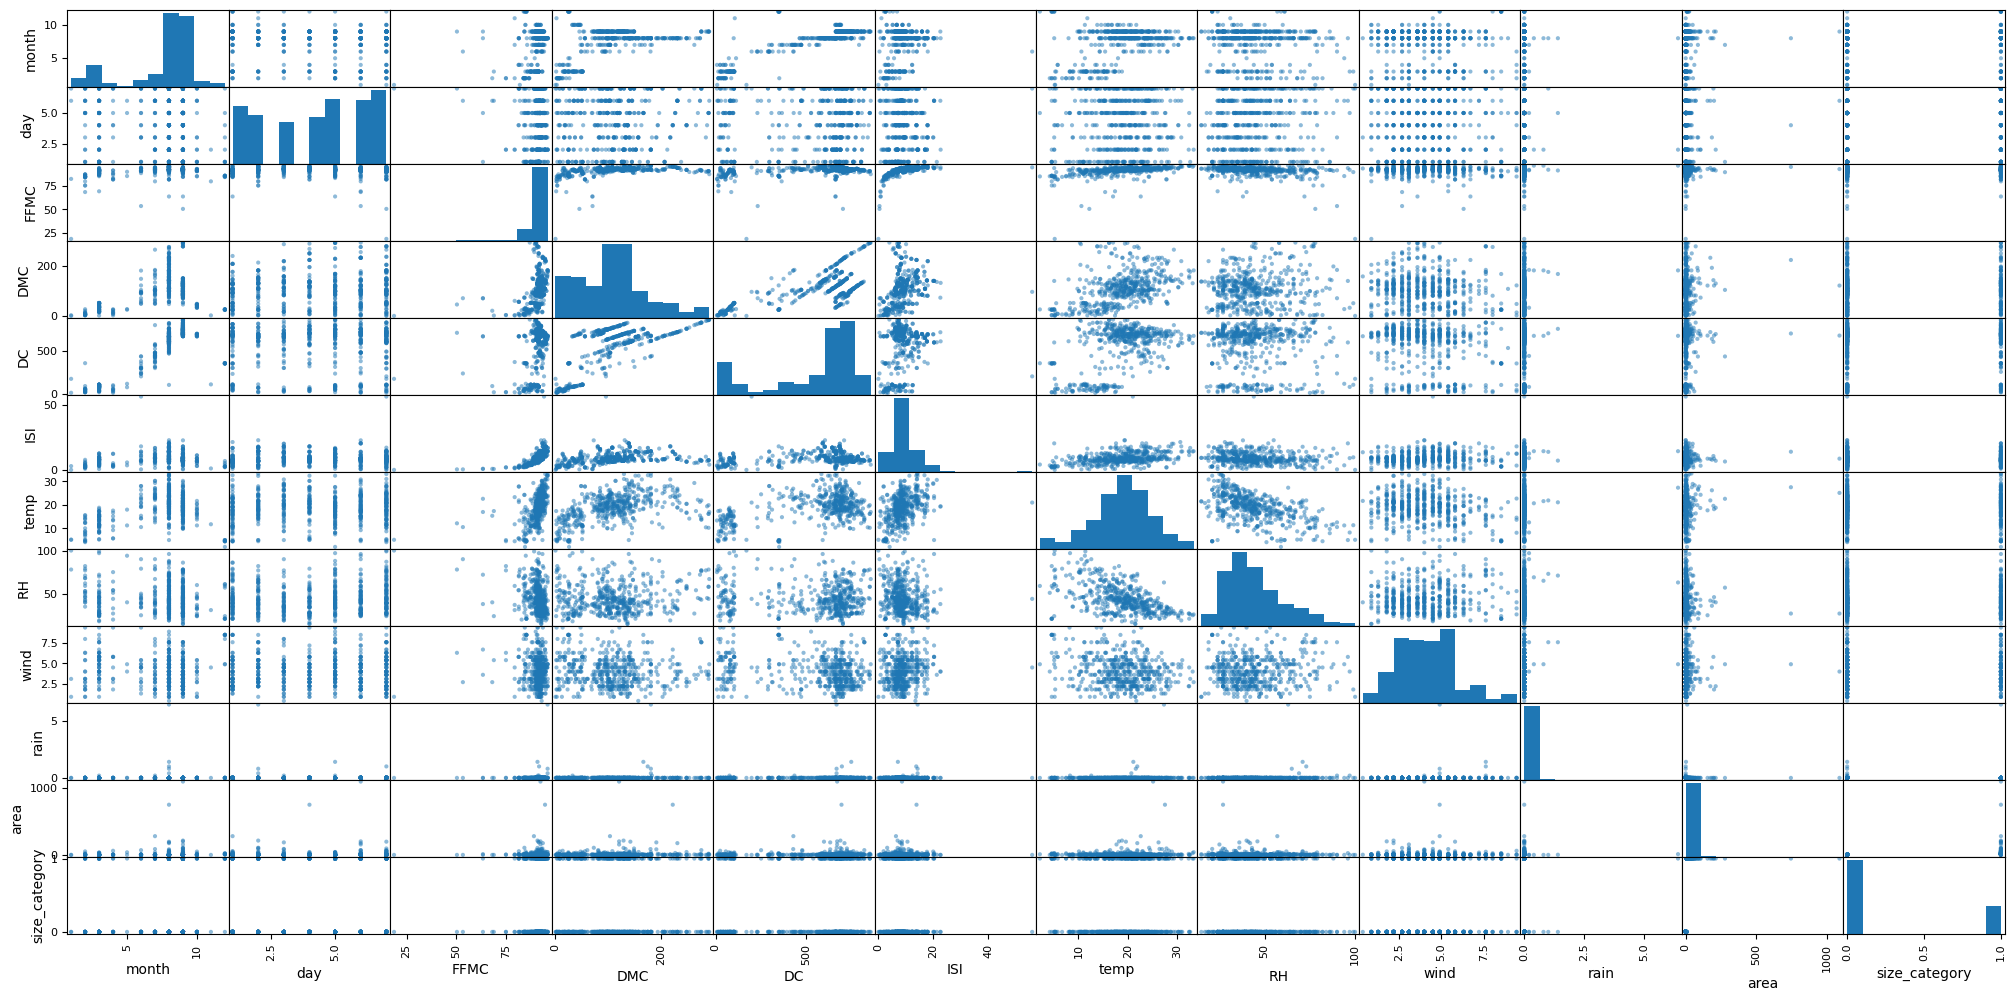

In [ ]:
# Checking corrlation using scatter_matrix, where in this we can see DC and DMC shows positive correlation.
scatter_matrix(df,figsize=(25,12))
plt.show()

##### Feature Engineering

In [ ]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [ ]:
# Selecting the columns to be standardized
columns_to_standardize = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']

# Creating a StandardScaler object
scaler = StandardScaler()

# Applying standardization to the selected columns to reduce the complexity of the model and incease convergence rate
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,0.0,0.00,0
1,10,2,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,0.0,0.00,0
2,10,6,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,0.0,0.00,0
3,3,5,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.2,0.00,0
4,3,7,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,0.0,6.44,1
513,8,7,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,0.0,54.29,1
514,8,7,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,0.0,11.16,1
515,8,6,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,0.0,0.00,0


In [ ]:
df['rain'].max()

6.4

In [ ]:
df['area'].max()

1090.84

In [ ]:
# Splitting the data into dependent and independent variable
X = df.drop(['area'],axis=1)
y = df['area']
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,0.0,0
1,10,2,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,0.0,0
2,10,6,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,0.0,0
3,3,5,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.2,0
4,3,7,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,0.0,1
513,8,7,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,0.0,1
514,8,7,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,0.0,1
515,8,6,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,0.0,0


In [ ]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 509, dtype: float64

In [ ]:
# Splitting the data into Train and test with the ratio of 80% and 20% repectively
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((407, 11), (102, 11), (407,), (102,))

In [ ]:
df.shape

(509, 12)

In [ ]:
# Creating the function name create_model to perform hyperparameter tuning to check best parameters
def create_model(neuron1,neuron2,init,activation_function,dropout_rate,learning_rate):
  model = Sequential()
  model.add(Dense(neuron1,input_dim=11,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='linear'))

  adam = Adam(lr=learning_rate)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])       #loss='binary_crossentropy' for binary classification
  return model

In [ ]:
model = KerasRegressor(build_fn=create_model, verbose=0)

neuron1 = [6,8]  #We can use more number of neurons as well
neuron2 = [4,6]
init = ['uniform','normal']  #we can put zero as well
activation_function = ['tanh','linear']
dropout_rate = [0.2,0.3] #we can give more values like 0.4, 0.5  [0.2,0.5]
learning_rate = [0.0001,0.001] #we can add more values like 0.01, 0.1, till 0.1 is good
batch_size=[40,60]
epochs = [50,100]

param_grids = dict(neuron1=neuron1,neuron2=neuron2,init=init,activation_function=activation_function,
                   dropout_rate=dropout_rate,learning_rate=learning_rate,batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(5),verbose=10)
grid_res = grid.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4
[CV 1/5; 1/256] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4;, score=-494.186 total time=   2.6s
[CV 2/5; 1/256] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4
[CV 2/5; 1/256] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4;, score=-418.873 total time=   1.5s
[CV 3/5; 1/256] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4
[CV 3/5; 1/256] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.000

[CV 4/5; 1/256] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4;, score=-353.072 total time=   2.0s
[CV 5/5; 1/256] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4


[CV 5/5; 1/256] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4;, score=-14812.269 total time=   2.0s
[CV 1/5; 2/256] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=6
[CV 1/5; 2/256] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=6;, score=-496.694 total time=   2.1s
[CV 2/5; 2/256] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=6
[CV 2/5; 2/256] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=6;, score=-416.393 total time=  37.1s
[CV 3/5; 2/256] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=6
[C

In [ ]:
print('Best: {}, using {}'.format(grid_res.best_score_, grid_res.best_params_))
means = grid_res.cv_results_['mean_test_score']
stds = grid_res.cv_results_['std_test_score']
params = grid_res.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{}, {} with: {}'.format(mean,stdev,param))

Best: -3268.209442138672, using {'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 6}
-3452.758251953125, 5687.619702395727 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 6, 'neuron2': 4}
-3454.2704162597656, 5691.671350650694 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 6, 'neuron2': 6}
-3454.3182861328123, 5689.856451781785 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 8, 'neuron2': 4}
-3450.3176147460936, 5688.55858267174 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 8, 'neuron2': 6}
-33

    The best model configuration achieved a remarkably low mean squared error (MSE) of approximately -3268.209, indicating strong
    predictive accuracy. However, a negative MSE is unusual and suggests potential overfitting. Further evaluation on validation data is essential
    to confirm the model's generalization capabilities.

In [ ]:
# Best: -3268.209442138672, using {'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 6}
def create_model():
  model = Sequential()
  model.add(Dense(8,input_dim=11,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(6,input_dim=8,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='linear'))

  adam = Adam(lr=0.001)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])       #loss='binary_crossentropy' for binary classification
  return model

model = KerasRegressor(build_fn=create_model, verbose=0, batch_size=40, epochs=100)
history = model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

6997.115603071615

In [23]:
from google.colab import files
doc = files.upload()

Saving gas_turbines.csv to gas_turbines (1).csv


In [24]:
df = pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [25]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [26]:
df.shape

(15039, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [28]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [29]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [30]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [31]:
df.T.duplicated()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

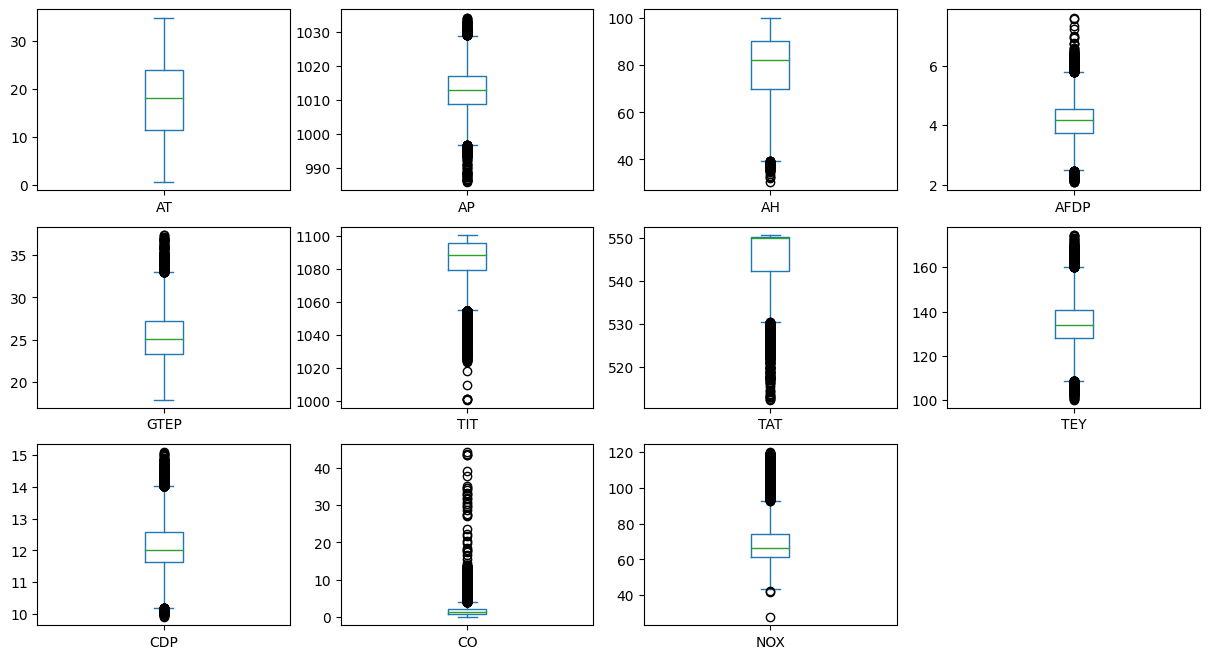

In [32]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,8))
plt.show()

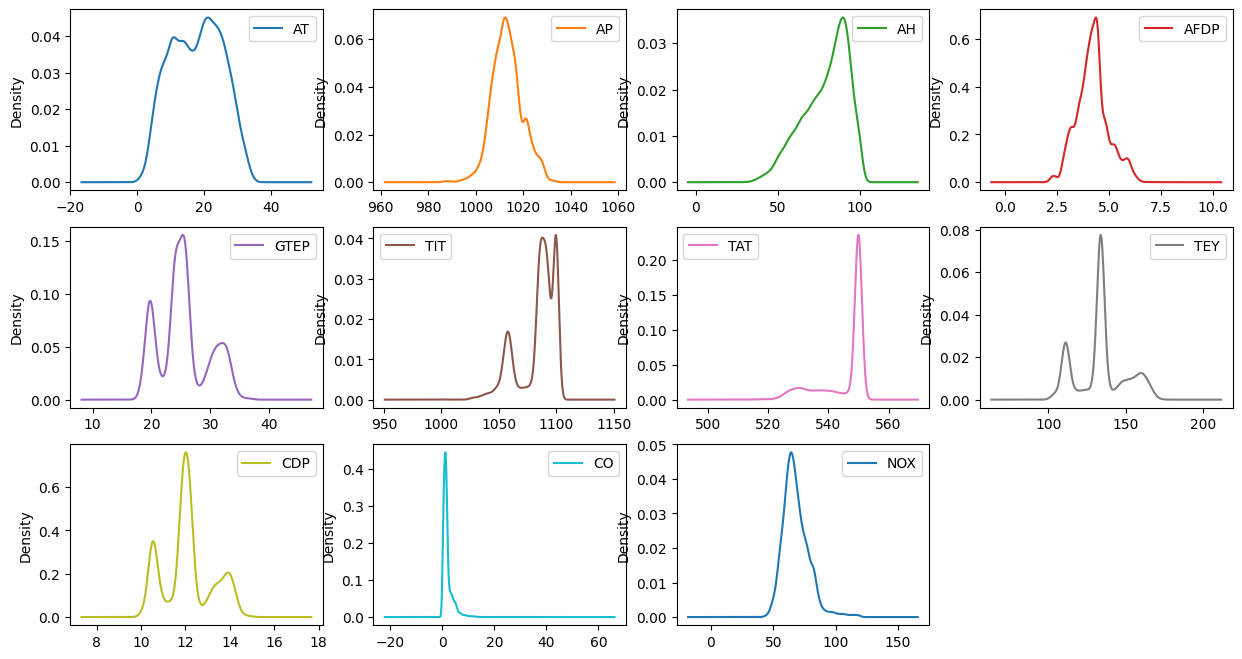

In [33]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False, figsize=(15,8))
plt.show()

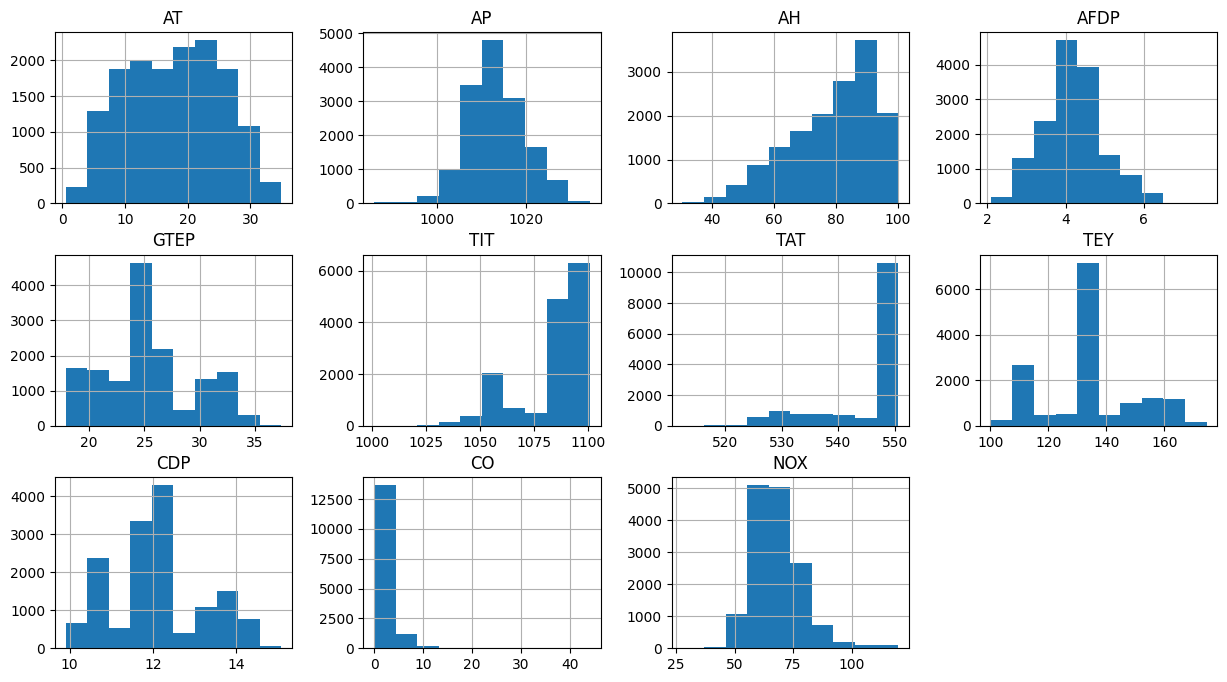

In [34]:
df.hist(figsize=(15,8),layout=(3,4))
plt.show()

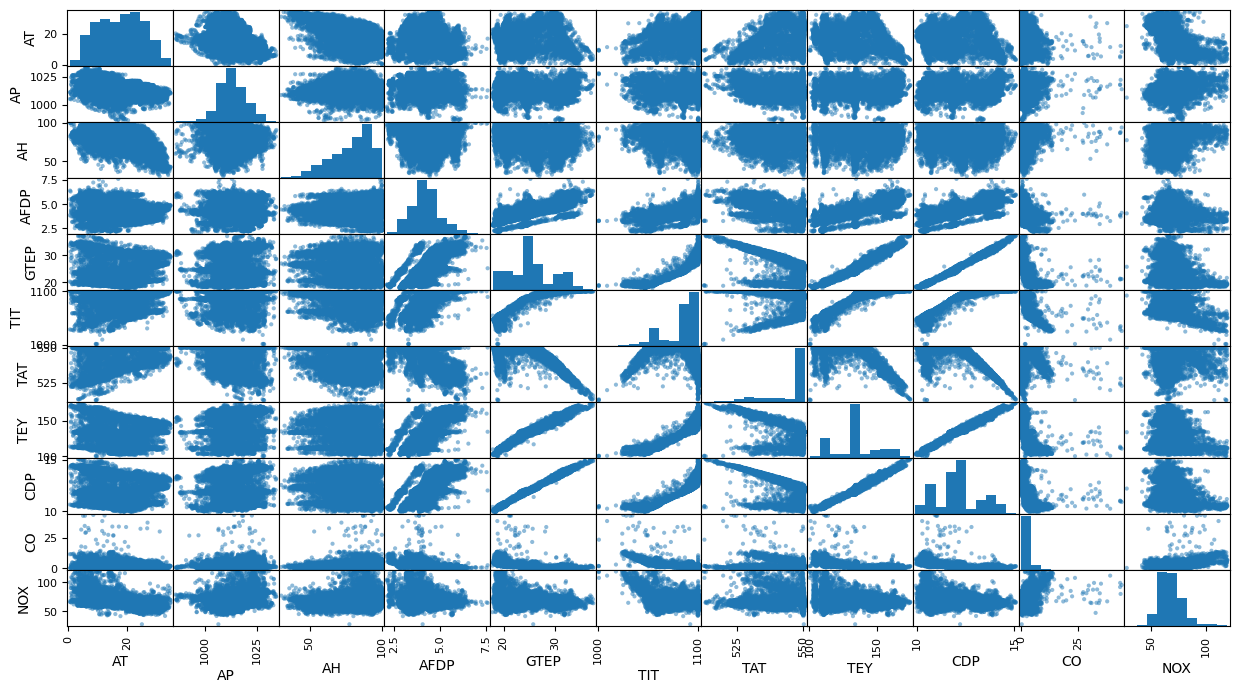

In [35]:
scatter_matrix(df,figsize=(15,8))
plt.show()

    The correlations TIT-GTEP, TEY-GTEP, TEY-TIT,CDP-GTEP, CDP-TIT shows postitive correlations. However TAT-GTEP shows negative correlation.

In [36]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [37]:
# Selecting the columns to be standardized
columns_to_standardize = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT','CDP','CO','NOX']

# Creating a StandardScaler object
scaler = StandardScaler()

# Applying standardization to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,114.70,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,114.72,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,114.71,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,114.72,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,114.72,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,111.61,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,111.78,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,110.19,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,110.74,-1.422598,1.924683,2.391165


In [38]:
# Splitting to dependent and independent variable
X = df.drop(['TEY'],axis=1)
y = df['TEY']
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [39]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [40]:
# Splitting data into train and test with the ratio of 80% and 20% respectively.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12031, 10), (3008, 10), (12031,), (3008,))

In [42]:
# Creating function to perform hyperparameter tuning to get best parameters
def create_model(neuron1,neuron2,init,activation_function,dropout_rate,learning_rate):
  model = Sequential()
  model.add(Dense(neuron1,input_dim=10,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='linear'))

  adam = Adam(lr=learning_rate)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])       #loss='binary_crossentropy' for binary classification
  return model

In [43]:
model = KerasRegressor(build_fn=create_model, verbose=0)

neuron1 = [6,8]  #We can use more number of neurons as well
neuron2 = [4,6]
init = ['uniform','normal']  #we can put zero as well
activation_function = ['tanh','linear']
dropout_rate = [0.2] #we can give more values like 0.4, 0.5  [0.2,0.5]
learning_rate = [0.0001,0.001] #we can add more values like 0.01, 0.1, till 0.1 is good
batch_size=[40,60]
epochs = [50,100]

param_grids = dict(neuron1=neuron1,neuron2=neuron2,init=init,activation_function=activation_function,
                   dropout_rate=dropout_rate,learning_rate=learning_rate,batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(5),verbose=10)
grid_res = grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5; 1/128] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4
[CV 1/5; 1/128] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4;, score=-15977.901 total time=  21.7s
[CV 2/5; 1/128] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4
[CV 2/5; 1/128] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4;, score=-16101.623 total time=  42.0s
[CV 3/5; 1/128] START activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.0001, neuron1=6, neuron2=4
[CV 3/5; 1/128] END activation_function=tanh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.

In [45]:
print('Best: {}, using {}'.format(grid_res.best_score_, grid_res.best_params_))
means = grid_res.cv_results_['mean_test_score']
stds = grid_res.cv_results_['std_test_score']
params = grid_res.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{}, {} with: {}'.format(mean,stdev,param))

Best: -22.792945098876952, using {'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 6}
-16049.500390625, 83.86377067291264 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 6, 'neuron2': 4}
-15212.3728515625, 150.02887008600527 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 6, 'neuron2': 6}
-15867.7857421875, 144.4758626829928 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 8, 'neuron2': 4}
-15020.50859375, 124.45306507503315 with: {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.0001, 'neuron1': 8, 'neuron2': 6}
-5597.058

    The output indicates that the hyperparameter tuning process has identified a promising model configuration.
    It achieved a mean squared error (MSE) of approximately -22.79, which suggests that the model has the potential to perform well.
    However, further validation and testing are required to ensure that this performance holds up on unseen data and to assess whether overfitting is a concern.

In [47]:
# Best: -22.792945098876952, using {'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 6}

def create_model():
  model = Sequential()
  model.add(Dense(8,input_dim=10,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(6,input_dim=8,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='linear'))

  adam = Adam(lr=0.001)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])       #loss='binary_crossentropy' for binary classification
  return model

model = KerasRegressor(build_fn=create_model, verbose=0, batch_size=40, epochs=100)
history = model.fit(X_train,y_train)

In [48]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

24.590517734654686